## Finding the Sqaure

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Detecting the Vertical edges

In [2]:
def masker(img,ker):
    img_ = np.zeros(img.shape)
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]-1):
            img_[i][j] = img[i][j-1]*ker[0] + img[i][j+1]*ker[2] + img[i][j]*ker[1]
    return img_.astype(int)



Finding the sqaures

In [5]:
def sqaureFinder(img):
    edged_img = masker(img.copy(),np.array([-1,2,1]))
    sqs,l,w,st,flag = [{'start':0,"length":0,"width":0}],[],[],[],False
    for i in range(edged_img.shape[0]-1):
        for j in range(edged_img.shape[1]-1):
            if img[i][j].any() != img[i][j+1].any():
                w.append(j)
            if img[i][j].any() != img[i+1][j].any():
                l.append(i)
            if img[i][j].any() != img[i+1][j+1].any():
                if flag==False:
                    st.append([i,j])
                    flag = !flag
                else:
                    flag =!flag
    l_,w_=[],[]
    [l_.append(x) for x in l if x not in l_],[w_.append(x) for x in w if x not in w_]
    st = np.array(st[0])+2
    return {'length':l_[1]-l_[0],'width':w_[1]-w_[0],'start':st}

Getting the file

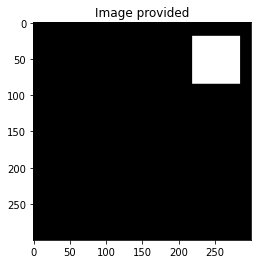

In [4]:
img = cv2.imread("2K20E22.bmp")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Image provided")
plt.show()

In [9]:
square = sqaureFinder(img)
print("Side = ",square['length'],'\nArea = ',square['length']*square['width'])
print('Start position = ',square['start'])

Side =  66 
Area =  4356
Start position =  [ 20 220]
